<a href="https://colab.research.google.com/github/kevinxav/handgesture/blob/main/DLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import zipfile

zip_file_path = '/content/drive/MyDrive/archive.zip'

destination_folder = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import f1_score
from keras.optimizers import RMSprop,Adam
from sklearn.metrics import confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
base_data_dir = "/content/leapgestrecog/leapGestRecog"
gestures = ["01_palm", "02_l", "03_fist", "04_fist_moved", "05_thumb", "06_index", "07_ok", "08_palm_moved", "09_c", "10_down"]
data = []
image_size = (50, 50)

for subject in range(10):
    subject_data_dir = os.path.join(base_data_dir, f"{subject:02d}")
    for gesture in gestures:
        gesture_dir = os.path.join(subject_data_dir, gesture)
        if os.path.exists(gesture_dir):
            for filename in os.listdir(gesture_dir):
                if filename.endswith(".png"):
                    image_path = os.path.join(gesture_dir, filename)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    resized_image = cv2.resize(image, image_size)
                    data.append({"gesture": gesture, "image": resized_image})

total_data_count = len(data)
print(f"Total: {total_data_count}")

Total: 20000


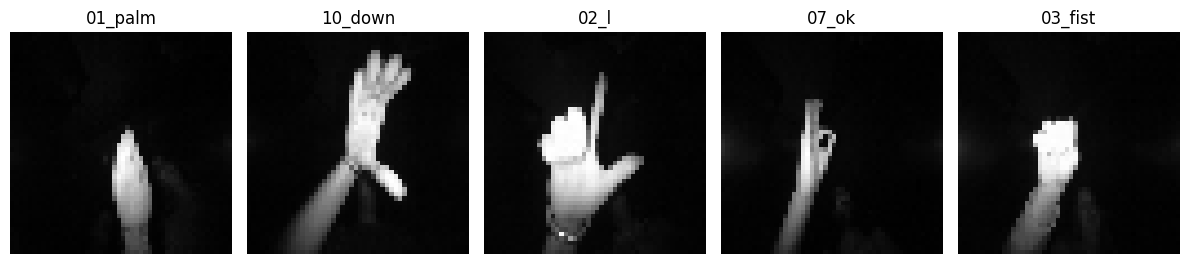

In [ ]:
num_samples_to_display = 5
plt.figure(figsize=(12, 8))

for i in range(num_samples_to_display):
    random_index = random.randint(0, len(data) - 1)
    sample = data[random_index]
    gesture = sample['gesture']
    image = sample['image']

    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(gesture)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame(data)
X_train = np.array(df['image'].tolist())

X_train = X_train.reshape(-1, 50, 50, 1)
X_train = X_train / 255.0

Y_train = df['gesture']

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (20000, 50, 50, 1)
Y_train shape: (20000,)


In [ ]:
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(Y_train)

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_labels = onehot_encoder.fit_transform(numerical_labels.reshape(-1, 1))

X_train, X_val, onehot_labels_train, onehot_labels_val = train_test_split(X_train, onehot_labels, test_size=0.1, random_state=2)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (50,50,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

epochs = 12
batch_size = 250

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, onehot_labels_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_val, onehot_labels_val))

Epoch 1/12
72/72 [==============================] - 36s 484ms/step - loss: 1.3734 - accuracy: 0.5304 - val_loss: 0.5751 - val_accuracy: 0.8520
Epoch 2/12
72/72 [==============================] - 35s 493ms/step - loss: 0.5306 - accuracy: 0.8201 - val_loss: 0.2079 - val_accuracy: 0.9570
Epoch 3/12
72/72 [==============================] - 39s 542ms/step - loss: 0.2967 - accuracy: 0.9045 - val_loss: 0.0845 - val_accuracy: 0.9805
Epoch 4/12
72/72 [==============================] - 33s 453ms/step - loss: 0.1948 - accuracy: 0.9387 - val_loss: 0.0546 - val_accuracy: 0.9865
Epoch 5/12
72/72 [==============================] - 33s 464ms/step - loss: 0.1356 - accuracy: 0.9588 - val_loss: 0.0290 - val_accuracy: 0.9950
Epoch 6/12
72/72 [==============================] - 33s 465ms/step - loss: 0.1003 - accuracy: 0.9693 - val_loss: 0.0195 - val_accuracy: 0.9965
Epoch 7/12
72/72 [==============================] - 35s 487ms/step - loss: 0.0833 - accuracy: 0.9726 - val_loss: 0.0131 - val_accuracy: 0.9985

In [ ]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(onehot_labels_val ,axis = 1)

63/63 [==============================] - 1s 18ms/step


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/5
800/800 [==============================] - 346s 427ms/step - loss: 1.8896 - accuracy: 0.3263 - val_loss: 2.3072 - val_accuracy: 0.2042
Epoch 2/5
800/800 [==============================] - 357s 446ms/step - loss: 1.5686 - accuracy: 0.4336 - val_loss: 2.3437 - val_accuracy: 0.2210
Epoch 3/5
800/800 [==============================] - 359s 449ms/step - loss: 1.4099 - accuracy: 0.4883 - val_loss: 2.4970 - val_accuracy: 0.2610
Epoch 4/5
800/800 [==============================] - 338s 423ms/step - loss: 1.2921 - accuracy: 0.5301 - val_loss: 2.7321 - val_accuracy: 0.1710
Epoch 5/5
200/200 [==============================] - 67s 327ms/step
              precision    recall  f1-score   support

           0       0.10      0.36      0.16       400
           1       0.12      0.01      0.02       400
           2       0.12      0.18    

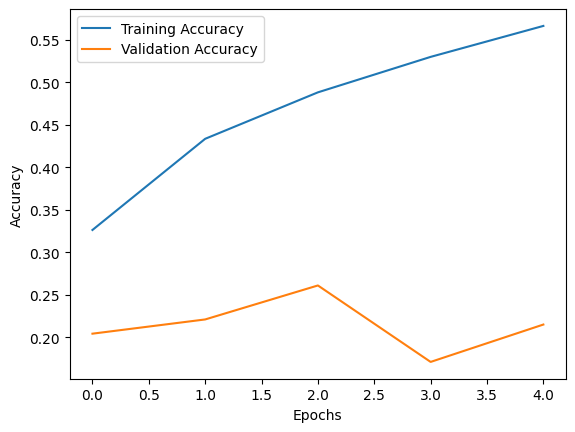

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

IMAGE_SIZE = (50, 50)
BATCH_SIZE = 20
NUM_CLASSES = len(os.listdir('/content/leapgestrecog/leapGestRecog'))  # Number of classes in your dataset
EPOCHS = 5
data_dir = '/content/leapgestrecog/leapGestRecog'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes


print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

data_dir = '/content/leapgestrecog/leapGestRecog'


input_shape = (50, 50)
num_classes = len(os.listdir(data_dir))


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=input_shape,
    batch_size=15,
    class_mode='categorical'
)


base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(input_shape[0], input_shape[1], 3)
)


x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=3
)


Found 20000 images belonging to 10 classes.
29084464/29084464 [==============================] - 0s 0us/step


Epoch 1/3
1333/1333 [==============================] - 905s 644ms/step - loss: 0.6474 - accuracy: 0.7909
Epoch 2/3
1333/1333 [==============================] - 863s 647ms/step - loss: 0.1061 - accuracy: 0.9645
Epoch 3/3
1333/1333 [==============================] - 877s 658ms/step - loss: 0.0924 - accuracy: 0.9691


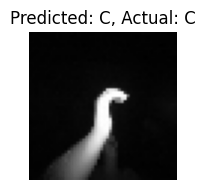

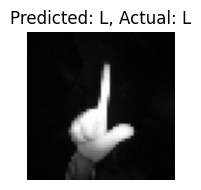

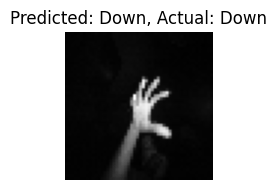

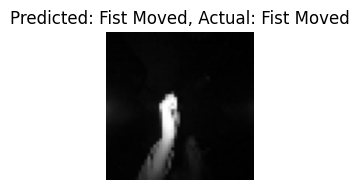

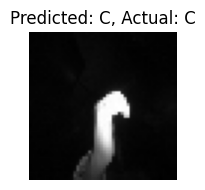

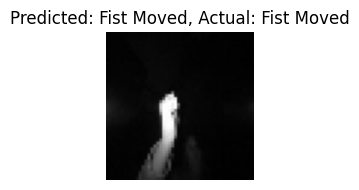

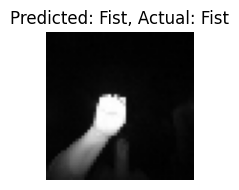

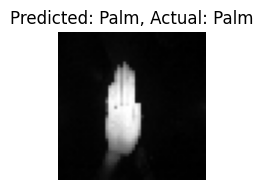

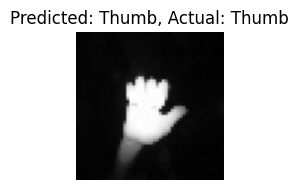

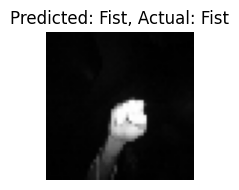

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(Y_true)

inverted_true = label_encoder.inverse_transform(Y_true)
inverted_pred = label_encoder.inverse_transform(Y_pred_classes)

label_map = {0: 'Palm', 1: 'L', 2: 'Fist', 3: 'Fist Moved', 4: 'Thumb', 5: 'Index', 6: 'OK', 7: 'Palm Moved', 8: 'C', 9: 'Down'}

inverted_true_names = [label_map.get(label, label) for label in inverted_true]
inverted_pred_names = [label_map.get(label, label) for label in inverted_pred]

sample_indices = np.random.choice(len(X_val), size=10, replace=False)

for idx in sample_indices:
    plt.figure(figsize=(3, 2))

    plt.imshow(X_val[idx].reshape(50, 50), cmap='gray')
    plt.title(f"Predicted: {inverted_pred_names[idx]}, Actual: {inverted_true_names[idx]}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()